In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
data = pd.read_csv("../data/processed/train.csv", header=None, na_filter=False)

## Positive vs Negative Reviews

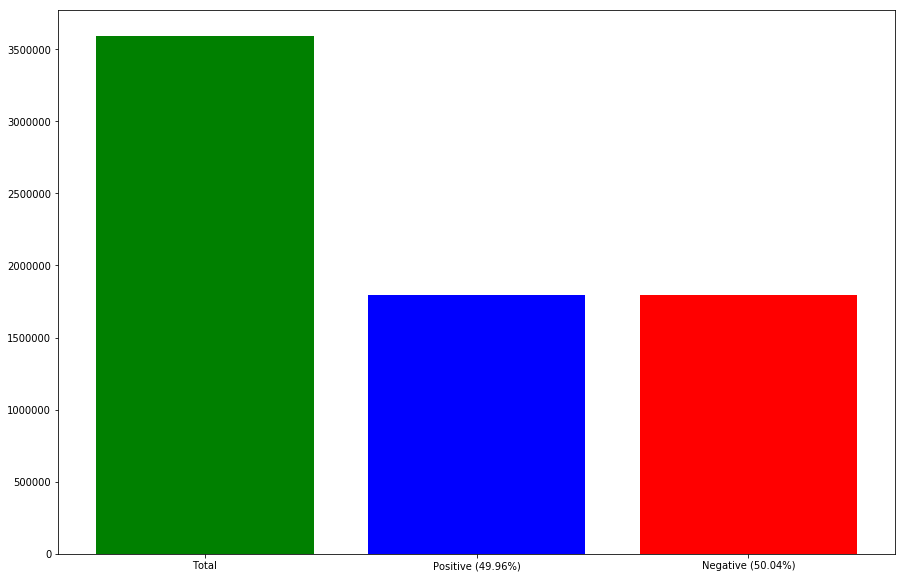

In [2]:
pos = data[data[0] == 1]
neg = data[data[0] == 0]

pos_percent = 100 * pos.shape[0] / data.shape[0]
neg_percent = 100 * neg.shape[0] / data.shape[0]

plt.figure(figsize=(15,10))
plt.bar([0, 1, 2], [len(data), len(pos), len(neg)], color=['g', 'b', 'r'])
plt.xticks([0, 1, 2], ['Total', 'Positive ({:.2f}%)'.format(pos_percent), 'Negative ({:.2f}%)'.format(neg_percent)])
plt.show()

In [3]:
%%capture
from keras.preprocessing.text import Tokenizer

pos_reviews = (pos[1] + " " + pos[2]).values
pos_tokenizer = Tokenizer(num_words=100)

pos_tokenizer.fit_on_texts(pos_reviews)

In [92]:
from keras.preprocessing.text import Tokenizer

neg_reviews = (neg[1] + " " + neg[2]).values
neg_tokenizer = Tokenizer(num_words=100)

neg_tokenizer.fit_on_texts(neg_reviews)

In [5]:
from nltk.corpus import stopwords

stopset = set(stopwords.words('english'))

In [88]:
def sorted_words(tokenizer, opposite_tokenizer=None):
    if opposite_tokenizer:
         tokens = [(word, frequency) for word, frequency in tokenizer.word_counts.items() if word not in stopset and word not in opposite_tokenizer.word_counts]
    else:
        tokens = [(word, frequency) for word, frequency in tokenizer.word_counts.items() if word not in stopset]
    sorted_words = sorted(tokens, key=lambda item: item[1], reverse=True)
    return list(sorted_words)

## Top 10 positive words

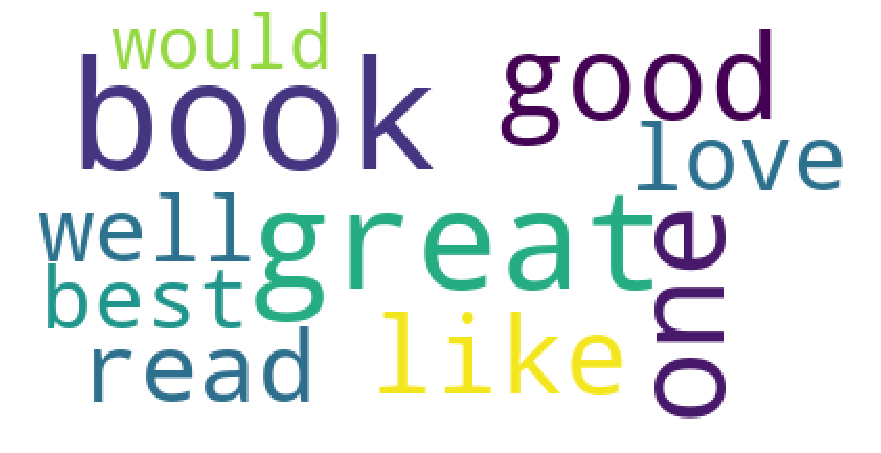

In [85]:
from wordcloud import WordCloud

pos_dict = dict((x, y) for x, y in sorted_words(pos_tokenizer))
pos_word_cloud = WordCloud(background_color="white", max_words=10)
pos_word_cloud.fit_words(pos_dict)

plt.figure(figsize=(15, 10))
plt.imshow(pos_word_cloud)
plt.axis("off")
plt.show()

## Top 10 negative words

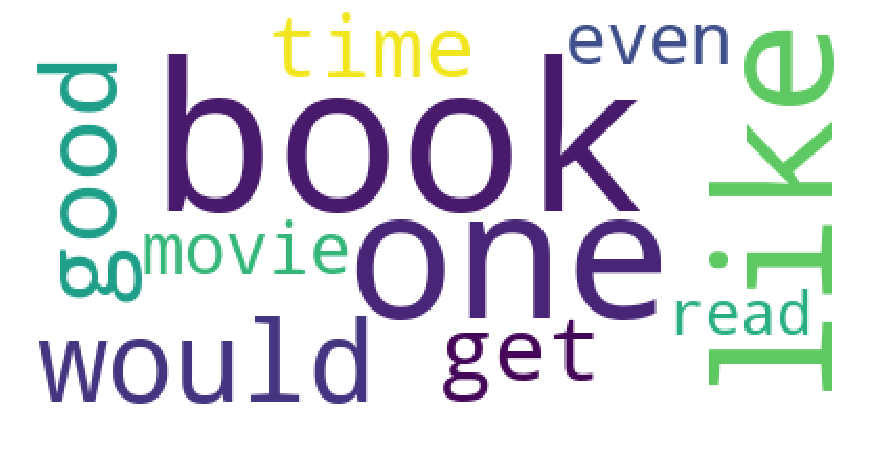

In [86]:
from wordcloud import WordCloud

neg_dict = dict((x, y) for x, y in sorted_words(neg_tokenizer))
neg_word_cloud = WordCloud(background_color="white", max_words=10)
neg_word_cloud.fit_words(neg_dict)

plt.figure(figsize=(15, 10))
plt.imshow(neg_word_cloud)
plt.axis("off")
plt.show()

## Top 10 positive words which are not in negative class

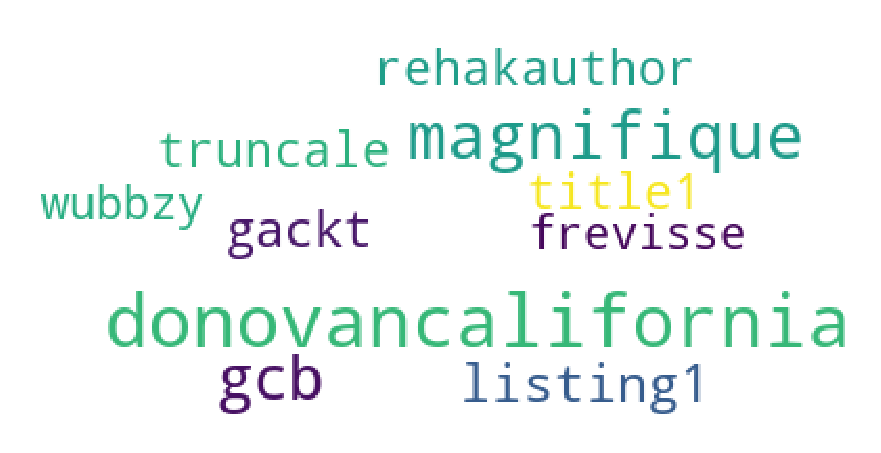

In [89]:
from wordcloud import WordCloud

pos_only_dict = dict((x, y) for x, y in sorted_words(pos_tokenizer, neg_tokenizer))
pos_only_word_cloud = WordCloud(background_color="white", max_words=10)
pos_only_word_cloud.fit_words(pos_only_dict)

plt.figure(figsize=(15, 10))
plt.imshow(pos_only_word_cloud)
plt.axis("off")
plt.show()

## Top 10 negative words which are not in positive class

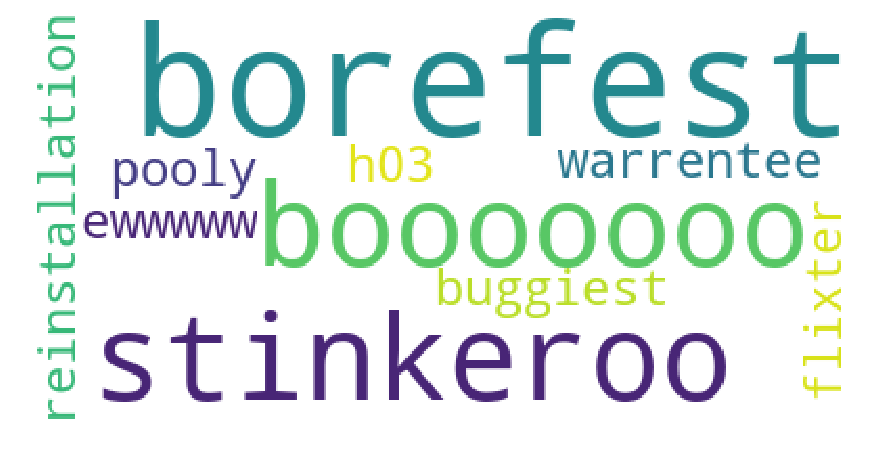

In [90]:
from wordcloud import WordCloud

neg_only_dict = dict((x, y) for x, y in sorted_words(neg_tokenizer, pos_tokenizer))
neg_only_word_cloud = WordCloud(background_color="white", max_words=10)
neg_only_word_cloud.fit_words(neg_only_dict)

plt.figure(figsize=(15, 10))
plt.imshow(neg_only_word_cloud)
plt.axis("off")
plt.show()